In [172]:
import random as random
import time
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("default")


### Autoria: Gabriel Henrique


In [173]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def selection_sort(array):
    for i in range(len(array)):
        min_idx = i
        for j in range(i + 1, len(array)):
            if array[min_idx] > array[j]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]


def shell_sort(array):
    n = len(array)
    interval = n // 2
    while interval > 0:
        for i in range(interval, n):
            temp = array[i]
            j = i
            while j >= interval and array[j - interval] > temp:
                array[j] = array[j - interval]
                j -= interval
            array[j] = temp
        interval //= 2


### Autoria: Gustavo Becelli


In [174]:
def first_quick_sort(array):
    if len(array) <= 1:
        return array
    pivot = array[0]
    l = [x for x in array[1:] if x <= pivot]
    h = [x for x in array[1:] if x > pivot]
    return first_quick_sort(l) + [pivot] + first_quick_sort(h)


def mid_quick_sort(array):
    if len(array) <= 1:
        return array
    pivot = array[len(array) // 2]
    l = [x for x in array[1:] if x <= pivot]
    h = [x for x in array[1:] if x > pivot]
    return mid_quick_sort(l) + [pivot] + mid_quick_sort(h)


def merge(array, l, m, r):
    L = array[l : m + 1]
    R = array[m + 1 : r + 1]

    i, j, k = 0, 0, l

    n1 = m - l + 1
    n2 = r - m

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            array[k] = L[i]
            i += 1
        else:
            array[k] = R[j]
            j += 1
        k += 1

    # Copy remaining elements of L[] or R[], if there
    while i < n1:
        array[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        array[k] = R[j]
        j += 1
        k += 1


def merge_sort(array, l: int = None, r: int = None):
    l = 0 if l is None else l
    r = len(array) - 1 if r is None else r
    if l < r:
        m = l + (r - l) // 2
        merge_sort(array, l, m)
        merge_sort(array, m + 1, r)
        merge(array, l, m, r)
    return array


### Autoria: Gabriel Nozawa


In [175]:
def bubble_sort(array):
    for i in range(0, len(array)):
        for j in range(1, len(array)-i):
            if array[j] < array[j-1]:
                temp = array[j]
                array[j] = array[j-1]
                array[j-1] = temp
    return array

def optimized_bubble_sort(array):
    for i in range(0, len(array)):
        troca = False
        for j in range(1, len(array)-i):
            if array[j] < array[j-1]:
                temp = array[j]
                array[j] = array[j-1]
                array[j-1] = temp
                troca  = True
        if(not troca):
            break

#funcao auxiliar do heap sort
def build_max_heap(A, length):
    pai = length//2 - 1
    for i in range(pai, -1, -1):
        max_heapify(A, i, length)

def max_heapify(A, indice, length):
    pai = indice
    filho = pai*2+1
    while(filho < length):
        #verifica se o pai tem 2 filhos ou nao
        if(filho+1 < length):
            #verifica qual dos filhos e o maior
            if(A[filho+1] > A[filho]):
                if(A[filho+1] > A[pai]):
                    aux = A[filho+1]
                    A[filho+1] = A[pai]
                    A[pai] = aux
                    pai = filho+1
                else:
                    break
            else:
                if(A[filho] > A[pai]):
                    aux = A[filho]
                    A[filho] = A[pai]
                    A[pai] = aux
                    pai = filho
                else:
                    break
        else:
            if(A[filho] > A[pai]):
                aux = A[filho]
                A[filho] = A[pai]
                A[pai] = aux
                pai = filho
            else:
                break
        filho = pai*2+1
            
def heap_sort(A):
    size = len(A)
    build_max_heap(A, size)
    for i in range(size-1, 0, -1):
        aux = A[i]
        A[i] = A[0]
        A[0] = aux
        max_heapify(A, 0, i)


### Calculating and plotting stuff


In [176]:
def calculate_elapsed_time(input, function):
    array = input.copy()
    start = time.time()
    function(array)
    end = time.time()
    return end - start

#regressao linear de 1/3 do array
def linear_behaviour(x, y):
    aux = len(x)//2
    lin = np.polyfit(x[:aux], y[:aux], 1)
    return np.poly1d(lin)

#regressao polinomial grau 2 de 1/3 do array
def quadratic_behaviour(x, y):
    aux = len(x)//2
    sqr = np.polyfit(x[:aux], y[:aux], 2)
    return np.poly1d(sqr)

#regressao nlogn de 1/3 do array
def nlog_behaviour(x, y):
    temp = []
    for i in range(0, len(x)):
        aux = x[i]*np.log2(x[i])
        temp.append(aux)
    return linear_behaviour(temp, y)


In [177]:
data_size = []
timings = []

functions = [
    insertion_sort,
    selection_sort,
    shell_sort,
    first_quick_sort,
    mid_quick_sort,
    merge_sort,
    bubble_sort,
    optimized_bubble_sort,
    heap_sort,
]
names = [
    "Insertion Sort",
    "Selection Sort",
    "Shell Sort",
    "First Quick Sort",
    "Mid Quick Sort",
    "Merge Sort",
    "Bubble Sort",
    "Optimized Bubble Sort",
    "Heap Sort",
]


In [ ]:
'''
max = 5000
for i in range(100, max, 100):
    #random_data = random.sample(range(0, max), i)
    data_size.append(i)
    for function in functions:
        sum = 0
        for j in range(0, 10):
            random_data = random.sample(range(0, max), i)
            sum += calculate_elapsed_time(random_data, function)
        median_time = sum/10
        timings.append(median_time)
'''


In [ ]:
'''
plt.figure(figsize=(20, 20), dpi=128)
for i in range(len(functions)):
    # Funcition name and time
    plt.subplot(3, 3, i + 1)
    plt.title(label=names[i])
    p1 = linear_behaviour(data_size, timings[i :: len(functions)])
    p2 = quadratic_behaviour(data_size, timings[i :: len(functions)])
    p3 = nlog_behaviour(data_size, timings[i :: len(functions)])
    plt.plot(data_size, timings[i :: len(functions)], ".", label="tempo obtido")
    plt.plot(data_size, p1(data_size), "b", label="n")
    plt.plot(data_size, p2(data_size), "r", label="n^2")
    plt.plot( data_size, p3(data_size*np.log2(data_size)), "g", label="nlogn")
    plt.xlabel("Tamanho dos dados")
    plt.ylabel("Tempo Gasto")
    plt.legend()
'''

In [ ]:
'''
plt.figure(figsize=(10, 10), dpi=96)
for i in range(len(functions)):
    # Funcition name and time
    plt.plot(data_size, timings[i :: len(functions)], label=names[i])
    plt.xlabel("Data Size")
    plt.ylabel("Time")
    plt.legend()


plt.title("Tempo para ordenar dados de tamanho variado")
plt.xlabel("Tamanho dos dados")
plt.ylabel("Tempo")
plt.legend()
'''

WIP

In [181]:
#cria um array com o tempo obtido
def complexity_graph(function, start: int, max: int, step: int=100):
    for mode in range(0, 3):
        time_array = []
        n_array = []
        for i in range(start, max, step):
            n_array.append(i)
            sum = 0
            if(mode == 0):#modo aleatorio
                plt.subplot(1, 3, 1)
                plt.title("Modo aleatório")
                random_data = random.sample(range(0, max), i)
                for j in range(0, 10):
                    data_copy = random_data.copy()
                    sum += calculate_elapsed_time(data_copy, function)
            elif(mode == 1):#modo ordenado
                plt.subplot(1, 3, 2)
                plt.title("Modo ordenado")
                random_data = list(range(0, max))
                for j in range(0, 10):
                    data_copy = random_data.copy()
                    sum += calculate_elapsed_time(data_copy, function)
            elif(mode == 2):#modo reverso
                plt.subplot(1, 3, 3)
                plt.title("Modo reverso")
                random_data = list(range(max, 0, -1))
                for j in range(0, 10):
                    data_copy = random_data.copy()
                    sum += calculate_elapsed_time(data_copy, function)
            average_time = sum/10
            time_array.append(average_time)
        p1 = linear_behaviour(n_array, time_array)
        p2 = quadratic_behaviour(n_array, time_array)
        p3 = nlog_behaviour(n_array, time_array)
        plt.plot(n_array, time_array, ".", label="tempo obtido")
        plt.plot(n_array, p1(n_array), "b", label="n")
        plt.plot(n_array, p2(n_array), "r", label="n^2")
        plt.plot(n_array, p3(n_array*np.log2(n_array)), "g", label="nlogn")
    plt.xlabel("Tamanho dos dados")
    plt.ylabel("Tempo Gasto")
    plt.legend()
    plt.show()

Insertion Sort Complexity Analysis

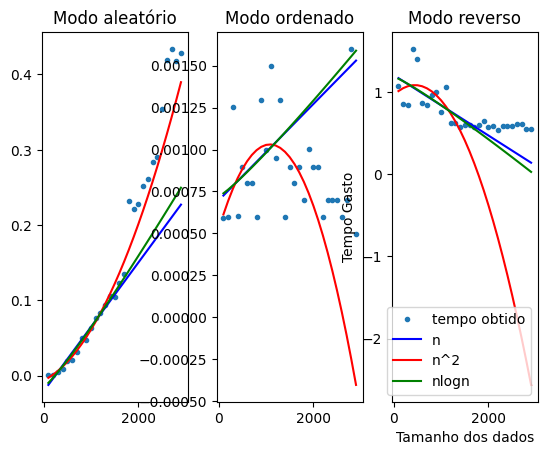

In [182]:
complexity_graph(insertion_sort, 100, 3000)

Selection Sort

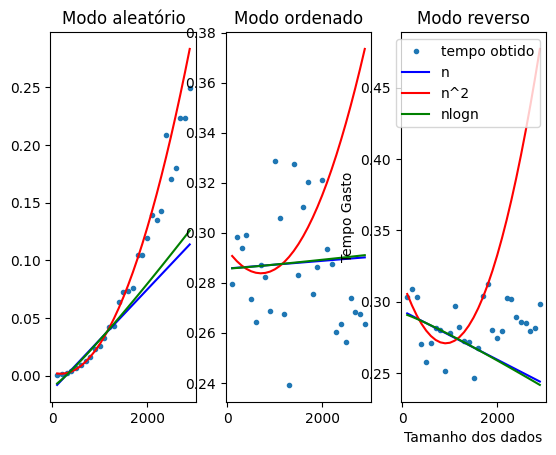

In [183]:
complexity_graph(selection_sort, 100, 3000)

Shell Sort

KeyboardInterrupt: 

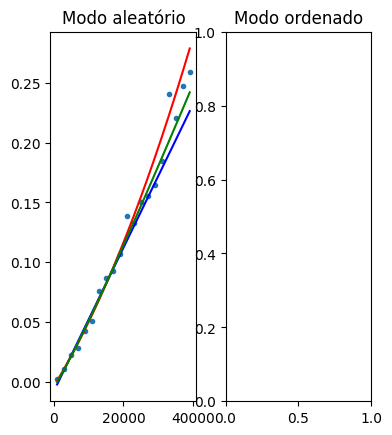

In [184]:
complexity_graph(shell_sort, 1000, 40000, step=2000)

First Pivot Quick Sort

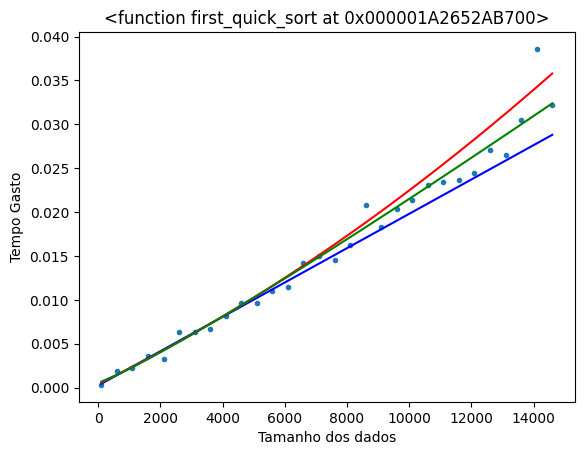

In [ ]:
complexity_graph(first_quick_sort, 100, 30000, step=5000)

Mid Pivot Quick Sort

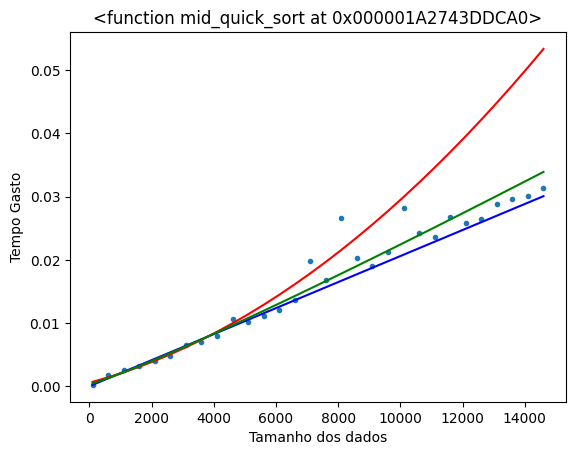

In [ ]:
complexity_graph(mid_quick_sort, 100, 15000, step=500)


Merge Sort

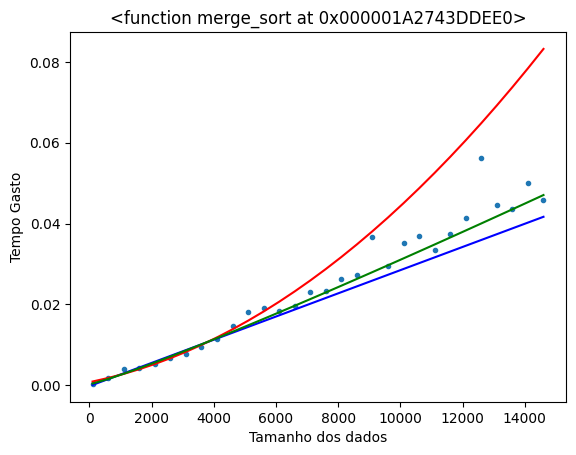

In [ ]:
complexity_graph(merge_sort, 100, 15000, step=500)

Bubble Sort

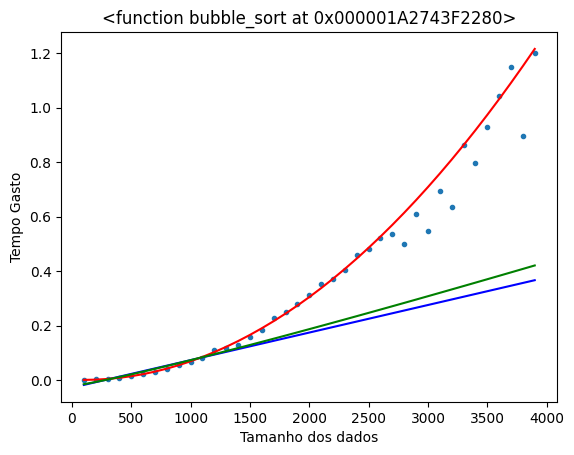

In [ ]:
complexity_graph(bubble_sort, 100, 4000)

Optimized Bubble Sort

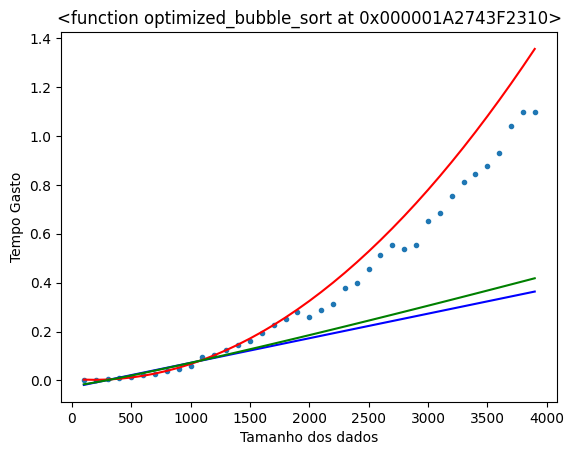

In [ ]:
complexity_graph(optimized_bubble_sort, 100, 4000)


Heap Sort

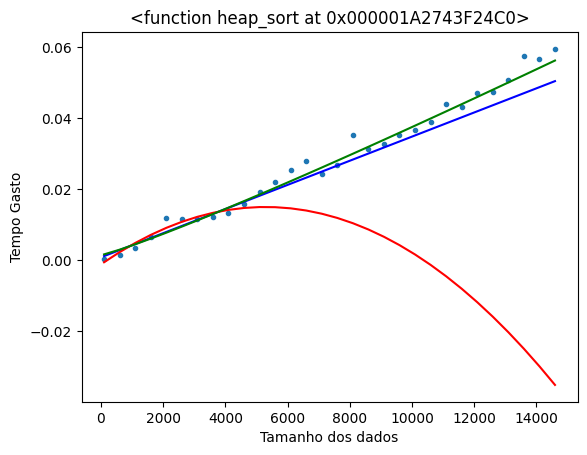

In [ ]:
complexity_graph(heap_sort, 100, 15000, step=500)